## Нелинейные задачи

### План

1. Нелинейные уравнения одной переменной
   - Метод дихотомии (деления пополам)
   - Метод Ньютона
   - Метод секущих
   - Метод простой итерации
   - Как найти все корни?
   
   
2. Нелинейные системы
   - Сведение к поиску минимума
   - Метод простой итерации
   - Метод Зейделя
   - Метод Ньютона
   
   
3. Нелинейная регрессия
   - Градиентный спуск
   - Метод нормального уравнения
   
   
4. Нелинейная регрессия окружности

5. Пример с методом Ньютона для комплекснозначной нелинейной функции

6. Нахождение всех корней многочлена


### Нелинейные уравнения одной переменной

Пусть имеем некоторую функцию одной переменной $f(x)$. Нас интересуют нули этой функции, т.е. задача решения уравнения

$$
f(x)=0
$$

Для простоты пока работаем с функцией одной переменной.

#### Метод дихотомии (деления пополам)

Пусть функция $f$ - непрерывная.

Пусть имеем две точки $x_{\text{left}} < x_{\text{right}}$ такие что

$$
f(x_{\text{left}} )\cdot f(x_{\text{right}}) < 0
$$

Тогда ясно, что где-то в интервале $(x_{\text{left}}:x_{\text{right}})$ будет корень искомого уравнения (по теореме о промежуточных значениях непрерывной функции).

Идея метода заключается в последовательном сужении отрезка до тех пор, пока не достигнем нужной точности корня. 

>Алгоритм:

>1. Фиксируем малый $\varepsilon$
>2. Пусть $x_0=\frac{x_{\text{left}}+x_{\text{right}}}{2}$
>    - Если $f(x_0) \cdot f(x_{\text{left}}) < 0$, то они имеют разный знак и принимаем $x_{\text{right}} = x_0$
>    - Иначе, если $f(x_0) \cdot f(x_{\text{left}}) > 0$, они имеют одинаковый знак и принимаем $x_{\text{left}} = x_0$
>  3. Если $|x_{\text{left}} - x_{\text{right}}| < \varepsilon$, то локализировали корень с точностью $\varepsilon$ и останавливаемся. Иначе, обратно на 2 шаг.

Метод крайне простой и эффективный. Однако, он не применим для поиска корней чётной кратности (в которой корень - локальный минимум или максимум). Также не обобщается на системы уравнений и на уравнению с комплекснозначной функцией.

#### Метод Ньютона

Пусть теперь $f$ - дифференциируема.

По сути, градиентный спуск. 

Пусть имеем некоторой приближение корня $x_n$. Смотрим на касательную к $f(x)$ в этой точке и ищем её пересечение с $Ox$. Это пересечение есть наше следующее приближение корня. Повторяем, пока не достигнем нужной точности.

![original image](https://cdn.mathpix.com/snip/images/iWAGd-KIeLEF5wOas8r-bmUALbliU1MoFWskBzoXPds.original.fullsize.png)

Формально,

>$$
 x_{n+1}=x_n-\frac{f\left(x_n\right)}{f'\left(x_n\right)}
$$

Этот метод работает быстрее метода дихотомии и с помощью него можно найти любые корни даже для комплекснозначных функций.

Тем не менее, этот метод имеет существенный недостаток - нестабильная сходимость. Например, на каком-то этапе производная может близко приблизиться к нулю, и мы улетим далеко-далеко от корня. Также возможны замкнутые циклы. 

Доработаем данный метод, отказавшись от точного вычисления производной.

#### Метод секущих 

Пусть $f$ - непрерывна.

Будем искать нуль функции $f(x)$. Выберем две начальные точки $B_0\left(x_0 ; f(x_0)\right)$ и $B_1\left(x_1 ; f(x_1)\right)$ и проведем через них прямую. Она пересечет ось абсцисс в точке $\left(x_2 ; 0\right)$. 

Теперь найдем значение функции с абсциссой $x_2$. Зададим точку $B_2 = (x_2, f(x_2))$, лежащею на графике. 

Теперь вместо точек $B_0$ и $B_1$ мы возьмём точку $B_2$ и точку $B_1$. Теперь с этими двумя точками проделаем ту же операцию и так далее, то есть будем получать две точки $B_{n+1}$ и $B_n$ и повторять операцию с ними. Отрезок, соединяющий последние две точки, пересекает ось абсцисс в точке, значение абсциссы которой можно приближённо считать корнем. 

Эти действия нужно повторять до тех пор, пока не получим значение корня с нужным приближением.


![original image](https://cdn.mathpix.com/snip/images/AdaRKQuFVBJpbSr9Rd-Dmyg0lpeiRJYq8U0kB2lwoRo.original.fullsize.png)


Формульно,

>$$
x_{n+1}=x_{n-1}-\frac{f\left(x_{n-1}\right) \cdot\left(x_n-x_{i-1}\right)}{f\left(x_n\right)-f\left(x_{n-1}\right)}
$$

Скорость у него не такая большая, как у метода Ньютона, но он работает на бОльшем классе функций.

#### Метод простой итерации

Из математического анализа нам известно, что если некоторая функция $F(x)$ является сжимающим отображением:

$$
| F(x) - F(y)| \leqslant \alpha \cdot |x -  y|, \quad \alpha < 1
$$

то она имеет стационарную точку.

В контексте нашей задачи, пусть свели исследуемое уравнение к виду:

$$
f(x)=0 \quad \iff \quad F(x)=x, \quad \text{где $F$ - cжимающее}
$$

Тогда корень будет стационарной точкой $F$ и его можно найти методом простой итерации:

>$$
F\left(x_n\right)=x_{n+1}
$$

![original image](https://cdn.mathpix.com/snip/images/x2nb5SwNvga-ULSctRZ9s1D21Hg-uFifwhZjy4p7To8.original.fullsize.png)



Если $f$ - дифференциируема, то проверить сжимаемость $F$ легко (достаточное условие):

$$
|F(x) - F(y)| =  \frac{|F(x) - F(y)|}{|x-y|} \cdot |x-y| \leq \max |F'| \cdot |x-y|
$$

$$
\max |F'| < 1
$$

Сжимаемость в данном случае __критично важна__. Например, следующий пример простой итерации не сходится никогда (кроме случае, если мы уже начали в корне):

$$
x^2=a \iff x=\frac{a}{x}
$$

$$
F(x)=\frac{a}{x}
$$

Как видим, может просто не повести с функцией $F$. Для того, чтобы избежать этого варианта, метод простой итерации некоторым образом обобщают (__метод релаксации__), при котором мы строим эквивалентную функцию

$$
F(x)=x-\lambda(x) f(x), \quad \lambda(x) \neq 0
$$

и пользуемся прежней итерационной формулой

>$$
F\left(x_n\right)=x_{n+1}
$$

Заметим, что метод Ньютона является частным случаем метода релаксации (выбором подходящего $\lambda(x)$).

#### Как найти все корни?

Все рассматриваемые ранее методы позволяли найти лишь один корень. А что если нам нужны все? Нетрудно догадаться, что делать.

Пусть мы нашли какое-то количество корней: $x_1, ..., x_k$ нашей $f(x)$. Строим функцию $g(x) = \frac{f(x)}{(x-x_1)...(x-x_k)}$ и находим какой-либо её корень!

Вот только после каждого деления мы повышаем ошибку округления. Таким образом, разумно с помощью данного подхода находить приближение к какому-либо новому корню $x_{k+1}^*$ и используем его как начальное приближение при поиске корня уже у самой $f(x)$.

### Нелинейные системы

Пусть имеем систему нелинейных уравнений

$$
\left\{\begin{array}{l}
f_1\left(x_1, x_2, \ldots, x_n\right)=0 \\
f_2\left(x_1, x_2, \ldots, x_n\right)=0 \\
...\\
f_n\left(x_1, x_2, \ldots, x_n\right)=0
\end{array} \quad \Leftrightarrow \quad \vec{F}(x)=0\right.
$$

Хотим найти все её корни.

#### Сведение к поиску минимума

Перепишем её в виде одной функции $n$ переменных:

>$$
\Psi(x)=\sum_{i=1}^n\left(f_n\right)^2=0
$$

А тогда решение системы эквивалентно поиску глобальных минимумов этой функции:

>$$
\min \Psi(x) = \, ?
$$

Простейшим способом поиска минимума является градиентный спуск, который мы ежу рассматривали в курсе. Другие методы мы рассмотрим на следующих семинарах.

#### Метод простой итерации

Аналогично параграфу про МПИ для функции одной переменной:

$$
\begin{aligned}
&\vec{F}(x)=0 \iff \vec{\Phi}(x)=x \\ \\
&x_{n+1}=\vec{\Phi}\left(x_n\right)
\end{aligned}
$$

Заметим, что домножение на невырожденную матрицу $\Lambda$ (которая также может зависеть от $x$) не влияет на корни. Таким образом, получаем обобщение __метода релаксации для нескольких переменных__:

$$
\vec{F}(x)=0 \iff \Lambda \vec{F}(x)=0
$$

и тогда $\vec{\Phi}(x)$ можно выбрать как

>$$
\vec{\Phi}(x)=x - \Lambda \vec{F}(x)
$$

и решать прежний итерационный процесс:

>$$
x_{n+1}=\vec{\Phi}\left(x_n\right)
$$

Достаточным условием сжимаемости отображения будет:

$$
\max _{x \in G} \max _i \sum_{j=1}^n\left|\frac{\partial \varphi_i(x)}{\partial x_j}\right| \leq q<1
$$

или, что эквивалентно, какая-либо норма матрицы Якоби $\vec{\Phi}(x)$ должна быть меньше единицы. 

#### Метод Зейделя

$$
\vec{F}(x)=0 \iff \vec{\Phi}(x)=x
$$

Является модификацией метода простой итерации, только теперь при вычислении следующих итераций мы будем пользоваться уже вычисленными новыми координатами:

>$$
\begin{aligned}
&x_1^{n+1}=\varphi_1\left(x_1^n, x_2^n, ..., x_n^n\right) \\
\\
&x_2^{n+1}=\varphi_2\left(x_1^{n+1}, x_2^n, \ldots, x_n^n\right)
\\ \\
&x_3^{n+1}=\varphi_3\left(x_1^{n+1}, x_2^{n+1}, x_3^{n} \ldots, x_n^n\right) \\
\\
&...
\end{aligned}
$$

По идее, должен сходится быстрее, чем обычный МПИ.

#### Метод Ньютона

Является частным случаем метода релаксации для системы при выборе $\Lambda (x) = J^{(-1)}(x)$ - обратная матрицы Якоби вектора уравнений $\vec{F}$. Тогда формула для итерации будет:

$$
x_{n+1}=x_n-J^{(-1)}\left(x_n\right) \cdot \vec{F}\left(x_n\right)
$$

Однако вычислять эту обратную матрицу Якоби вовсе необязательно. Заметим, что эта формула эквивалентна следующей системе линейных уравнений:

>$$
J\left(x_n\right) \Delta x_{n+1}=-\vec{F}\left(x_n\right)
$$

Решая эту СЛАУ относительно вектора $\Delta x_{n+1}$, мы и получаем прибавку на текущей итерации.


### Нелинейная регрессия

Напомним формулировку задачу регрессии (семинар 1.2).

Пусть имеем конечный набор точек $\left\{\left(x_i, y_i\right)\right\}_{i=1}^N$, причём  $x_i \in \mathbb{R}^m, y_i \in \mathbb{R}$. Хотим найти функцию $\check{y}$, наилучшим образом аппроксимирующий данный набор точек.

"Наилучшим" в плане минимизации какой-либо функции ошибки (Loss). Самой простой и широко-используемой является средний квадрат отклонений (MSE)

$$
MSE = \mathcal{L}\left(\check{y}_i, y_i\right)=\frac{1}{N} \sum_{i=1}^N\left(\check{y}_i-y_i\right)^2
$$

В отличие от предыдущих семинаров, сейчас рассмотрим задачу нелинейной регрессии.

Пусть ищем наилучшую функцию среди некоторого класса функций $\check{y} = f(w, x)$ - где зависимость от вектора весов $w=(w_1, w_2, ..., w_m)$  в общем случае __нелинейна__.

Алгоритм не меняется. Пытаемся минимизировать MSE по весам $w_k$:

$$
MSE = \mathcal{L}=\frac{1}{N} \sum\limits_{i = 1}^{N}\left(f(w, x_i) - y_i\right)^2=\frac{1}{N}\sum_{i=1}^N r_i^2 \rightarrow min
$$ 

где введено обозначение для __невязки__ на каждой точке из выборки $r_i = y_i - f(w, x_i)$. Как обычно, невязка это "то что хотим" минус "что имеем".

Это выражение можно минимизировать итеративно с помощью __градиентного спуска__ (или его стохастической версии):

>$$
w^{(n+1)}_k=w^{(n)}_k-\alpha \cdot  \left.\frac{\partial \mathcal{L}(w)}{\partial w_{k}}\right|_{w^{(n)}} =w^{(n)}_k+\frac{2\alpha}{N}\cdot\sum_{i=1}^N r_i\cdot \left. \frac{\partial f(w, x_i)}{\partial w_k} \right|_{w^{(n)}}
$$ 

Также можно воспользоваться итерационным __методом нормального уравнения__.

В предположении о том, что на каждом шаге мы будем менять веса несильно, разложим модельную функцию в ряд Тейлора по приращению весов на каждом шаге и на каждом $x_i$:

$$
f(w^{(n+1)},x_i) \approx f(w^{(n)},x_i)  + \sum_{k=1}^{m}  \left. \frac{\partial f(w, x_i)}{\partial w_k} \right|_{w^{(n)}} \cdot \Delta w_k^{(n+1)} = f(w^{(n)},x_i)  + \sum_{k=1}^{m}  J_{ik}^{(n)} \cdot \Delta w_k^{(n+1)}
$$

где введено обозначение $J_{ik}^{(n)}=\left. \frac{\partial f(w, x_i)}{\partial w_k} \right|_{w^{(n)}}$.

Заметим,

$$
\frac{∂r_i}{∂w_k}=\frac{∂\left( y_i - f(w, x_i)\right)}{∂w_k}=-\frac{\partial f(w, x_i)}{\partial w_k}=-J_{ik}
$$

А тогда производная Loss-а:

$$
\frac{\partial \mathcal{L}}{\partial w_k} = \frac{2}{N}\sum_{i=1}^N r_i \frac{∂r_i}{∂w_k} =\frac{2}{N}\sum_{i=1}^N \left(f(w, x_i)- y_i \right)\cdot J_{ik} = 0
$$

Далее забьём на константу перед суммой. Положим, что для итерации $w^{(n+1)}$ данное равенство выполнено (или по крайней мере выполнено приближенно) и разложим $f(w^{(n+1)},x_i)$ в ряд Тейлора:

$$
\sum_{i=1}^N \left(f(w^{(n)},x_i)  + \sum_{j=1}^{m}  J_{ij}^{(n)} \cdot \Delta w_j^{(n+1)} - y_i \right)\cdot J_{ik}^{(n)} \approx 0
$$

Перетасуем слагаемые:

$$
\sum_{i=1}^N \sum_{j=1}^{m} J_{ik}^{(n)} J_{ij}^{(n)}\Delta w_j^{(n+1)}=\sum_{i=1}^N J_{ik}^{(n)} \left(y_i - f(w^{(n)},x_i)\right)
$$

Запишем это равенство в матричном виде ($r^{(n)}$- столбец невязок для каждого объекта при $w^{(n)}$):

>$$
\left(J_{(n)}^TJ_{(n)}\right)\Delta w^{(n+1)} = J_{(n)}^T\cdot r^{(n)}
$$

Эта система линейных уравнений называется __нормальным уравнением__. Решая её, мы получаем наилучшую траекторию для поиска минимума Lossa. Заметим, что в случае линейной регрессии, сходимся к ответу за 1 итерацию.

### Нелинейная регрессия окружности

Напишем функцию, которая по заданным координатам 4 точек на плоскости находит уравнение окружности (координаты центра x0, y0 и радиус R), для которой сумма квадратов расстояний от этих 4 точек до центра окружности является минимальной. Нарисуем график (отметим 4 точки, центр и нарисуем саму окружность).

In [16]:
from scipy.optimize import minimize # в данном методе реализованы все методы минимизации, упомянутые сегодня
import numpy as np


def distance_to_circle(t, x0, y0, R, x, y):
    
    # x0, y0, R - параметры окружности
    # x, y - точка, до которой определяем минимальное расстояние от окружности
    # t - угол на окружности, до точки до которой определяем расстояние
    
    x_na_okr = R*np.cos(t) + x0
    y_na_okr = R*np.sin(t) + y0
    
    return ((x_na_okr - x)**2 + (y_na_okr - y)**2)**2

def minimum_distance_to_circle(x0, y0, R, x, y):
    
    # Определяет минимальное расстояние от точки до окружности
    
    dist_min = (minimize(distance_to_circle, 0, (x0, y0, R, x, y)))['fun']
          
    return dist_min

# Реализуем функцию ошибки 

def MSE(circle, *args):
    
    x0 = circle[0]
    y0 = circle[1]
    R = circle[2]
    
    x1, y1, x2, y2, x3, y3, x4, y4 = args
    
    return 1./4*(minimum_distance_to_circle(x0, y0, R, x1, y1)**2
                + minimum_distance_to_circle(x0, y0, R, x2, y2)**2
                + minimum_distance_to_circle(x0, y0, R, x3, y3)**2
                + minimum_distance_to_circle(x0, y0, R, x4, y4)**2)


# Генерируем 4 случайные точки на плоскости

x1 = 10*np.random.random() - 5
y1 = 10*np.random.random() - 5

x2 = 10*np.random.random() - 5
y2 = 10*np.random.random() - 5

x3 = 10*np.random.random() - 5
y3 = 10*np.random.random() - 5

x4 = 10*np.random.random() - 5
y4 = 10*np.random.random() - 5

# Минимизируем MSE по параметрам окружности

x0_start = 0
y0_start = 0
R_start = 1

circle_start = np.array([x0_start, y0_start, R_start])

minimize(MSE, circle_start, (x1, y1, x2, y2, x3, y3, x4, y4))

      fun: 0.226210112453075
 hess_inv: array([[ 2.71415938,  1.02563456, -2.37183529],
       [ 1.02563456,  1.04588161, -1.36713612],
       [-2.37183529, -1.36713612,  2.45953693]])
      jac: array([1.94087625e-06, 1.19768083e-06, 2.81818211e-06])
  message: 'Optimization terminated successfully.'
     nfev: 252
      nit: 50
     njev: 63
   status: 0
  success: True
        x: array([-3.38858844, -0.99957679,  5.1187779 ])

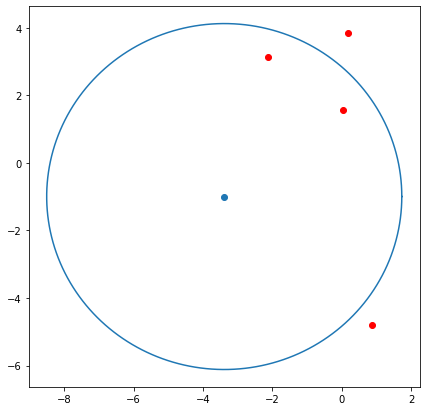

In [21]:
circle = minimize(MSE, circle_start, (x1, y1, x2, y2, x3, y3, x4, y4))['x']

x0 = circle[0]
y0 = circle[1]
R = circle[2]

import matplotlib.pyplot as plt
plt.figure(figsize = (7, 7))


ts = np.linspace(0, 2*np.pi, 200)
xs = x0 + R*np.cos(ts)
ys = y0 + R*np.sin(ts)

plt.plot(xs, ys)
plt.scatter(x0, y0)

plt.scatter(x1, y1, c='r')
plt.scatter(x2, y2, c='r')
plt.scatter(x3, y3, c='r')
plt.scatter(x4, y4, c='r')

### Пример с методом Ньютона для комплекснозначной нелинейной функции

Реализуем метод Ньютона на практике, чтобы построить области притяжения разных корней нелинейного уравнения на комплексной плоскости. Разными цветами закрашены области притяжения для разных корней. 

In [1]:
from scipy import optimize # В этом модуле есть все рассказанные методы оптимизации (нахождения корней или минимумов)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

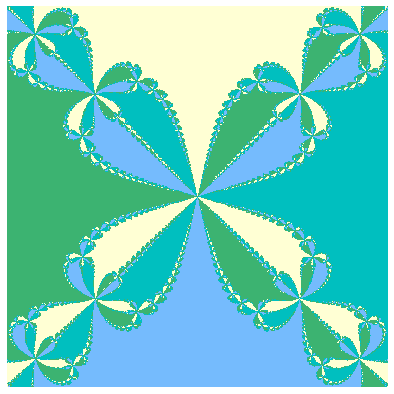

In [9]:
# A list of colors to distinguish the roots.
colors = ['xkcd:eggshell', 'mediumseagreen', 'c', 'xkcd:sky blue']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        
        # Вместо всей этой секции z = optimize.newton(f, z0, fprime)
        
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.figure(figsize=(7,7))
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**4 - 1
fprime = lambda z: 4*z**3

plot_newton_fractal(f, fprime, n=800)

Видим, что метод Ньютона достаточно нелокальный. Нельзя сказать, что мы всегда двигаемся к ближайшёму корню.

### Нахождение всех корней многочлена

Найдите корни полинома $x^4-11 x^3+9 x^2+11 x-10$.

Какую (приблизительно) долю площади на комплексной плоскости от круга $|z|<10$ занимает область притяжения наибольшего корня по модулю? Решить перебором точек.

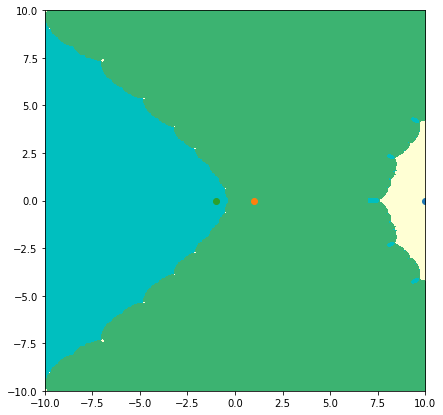

[(9.999999999999996+1.0423244797614476e-15j), (1.000000014266004-8.680596700749564e-09j), (-1.0000000000250509-9.374439725630672e-12j)]
S = 8.792839736163463


In [57]:
# A list of colors to distinguish the roots.
colors = ['xkcd:eggshell', 'mediumseagreen', 'c', 'xkcd:sky blue']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        
        # Вместо всей этой секции z = optimize.newton(f, z0, fprime)
        
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1    
        
    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
                
    
    count_r_a = [0, 0]
    max_ = -1
    i_max = -1   
        
    for i, root in enumerate(roots):
        abs_ = root.real**2 + root.imag**2
        
        if abs_ > max_:
            max_ = abs_
            i_max = i
    
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            if x**2 + y**2 < 10**2:
                count_r_a[1] += 1

                if (m[iy, ix] == i_max):
                    count_r_a[0] += 1
                
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
        
    plt.figure(figsize=(7,7))
    plt.imshow(m, extent = [xmin, xmax, ymin, ymax], cmap=cmap)
    
    for i, root in enumerate(roots):
        plt.scatter(root.real, root.imag)
    
    plt.show()
    
    return roots, float(count_r_a[0]/count_r_a[1])*np.pi*100

f = lambda z: z**4 - 11*z**3 + 9*z**2 + 11*z - 10
fprime = lambda z: 4*z**3 - 33*z**2 + 18*z + 11

domain=(-10, 10, -10, 10)
n = 400

roots, m = plot_newton_fractal(f, fprime, n=n, domain=domain)
print(roots)
print(f"S = {m}")

Проверим, что нашли все корни

In [64]:
import sympy as smp

x = smp.symbols("x")
f = x**4 - 11*x**3 + 9*x**2 + 11*x - 10

display(f)

f1 = (f/(x-10)).simplify()
display(f1)

f2 = (f1/(x-1)).simplify()
display(f2)

f3 = (f2/(x-1)).simplify()
display(f3)

f4 = (f3/(x+1)).simplify()
display(f4)

x**4 - 11*x**3 + 9*x**2 + 11*x - 10

x**3 - x**2 - x + 1

x**2 - 1

x + 1

1

In [ ]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# A list of colors to distinguish the roots.
colors = ['b', 'r', 'g', 'y']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    try:
      z = optimize.newton(f, z0, fprime)
      return z
    except:
      return False

def plot_newton_fractal(f, fprime, n=200, domain=(-4, 4, -4, 4)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**4 + 9*z*z + 11*z - 20
fprime = lambda z: 4*z**3 + 18*z + 11

plot_newton_fractal(f, fprime, n=200)